In [1]:
import numpy as np 
import pandas as pd 
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
import torch
import matplotlib.pyplot as plt 

In [2]:
sphere_traj = torch.load("./optim_traj_sphere.pkl", map_location=torch.device('cpu'))
triangle_traj = torch.load("./optim_traj_triangle.pkl", map_location=torch.device('cpu'))

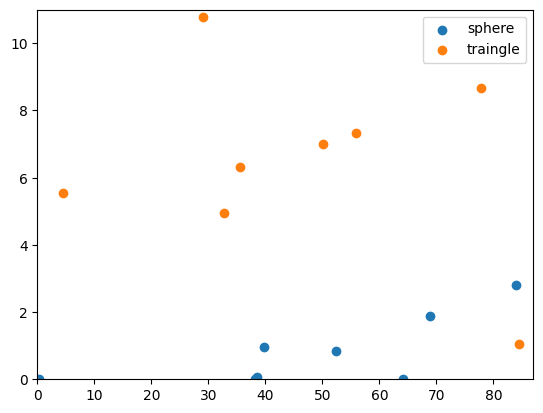

In [3]:
sphere_comps = sphere_traj["X_traj"][:,-1,:]
triangle_comps = triangle_traj["X_traj"][:,-1,:]

fig, ax = plt.subplots()
ax.scatter(sphere_comps[:,0], sphere_comps[:,1], label="sphere")
ax.scatter(triangle_comps[:,0], triangle_comps[:,1], label="traingle")
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
ax.legend()
plt.show()

In [4]:
line_comps = np.load("./line_comps.npy")

In [5]:
volumes = np.hstack((sphere_comps[:,0], triangle_comps[:,0]))
times = np.hstack((sphere_comps[:,1], triangle_comps[:,1]))
n_samples = len(volumes)

In [6]:
Z2 = np.round(volumes.reshape(-1,1)).astype(int)
Hepes = np.array([54]*n_samples).reshape(-1,1)
Z2M246I = np.array([87]*n_samples).reshape(-1,1)
Au = np.array([13]*n_samples).reshape(-1,1)
array = np.hstack((Hepes, Z2M246I, Au, Z2))
water = 280 - np.sum(array, axis=1).reshape(-1,1)
volume_array = np.hstack((water, array))
volume_df = pd.DataFrame(volume_array, columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df

,Water,HEPES,Z2M246I,Au,Z2
0,74,54,87,13,52
1,88,54,87,13,38
2,86,54,87,13,40
3,57,54,87,13,69
4,42,54,87,13,84
5,87,54,87,13,39
6,126,54,87,13,0
7,62,54,87,13,64
8,70,54,87,13,56
9,93,54,87,13,33


In [7]:
DT1 = np.array([0]*n_samples).reshape(-1,1)
DT2 = np.array([0]*n_samples).reshape(-1,1)
DT3 = np.array([0]*n_samples).reshape(-1,1)
DT4 = np.round(times.reshape(-1,1)).astype(int)
time_array = np.hstack((DT1, DT2, DT3, DT4))
time_df = pd.DataFrame(time_array, columns=['DT1', 'DT2', 'DT3', 'DT4'])
time_df

,DT1,DT2,DT3,DT4
0,0,0,0,1
1,0,0,0,0
2,0,0,0,1
3,0,0,0,2
4,0,0,0,3
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,7
9,0,0,0,5


In [8]:
volume_df.to_csv('./volumes_SDL.csv',index=False)
time_df.to_csv('./times_SDL.csv',index=False)